In [13]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt



In [14]:
dcr_study_original = pd.read_csv("../experiments/ablation_study_dcr.csv")

In [15]:
print(dcr_study_original.columns)
dcr_study = dcr_study_original[[
    'experiment',
    'dataset',
    'fold',
    'test_accuracy',
    'aggregation_mode',
    'nonlinearity',
    'concept_embedding_size',
    'layer_type',
    'entropy_loss_scaling'
]]

filter = dcr_study['entropy_loss_scaling'] != 'False' # Just one data point
dcr_study = dcr_study[filter]

# print(dcr_study[dcr_study['']])
print(dcr_study['dataset'].unique())


Index(['experiment', 'start_time', 'dataset', 'fold', 'test_accuracy',
       'test_accuracy_dt', 'test_accuracy_dt_pruned', 'test_accuracy_cm',
       'data_dir', 'temperature', 'layer_type', 'aggregation_mode',
       'nonlinearity', 'evaluation_nonlinearity', 'concept_embedding_size',
       'concept_temperature', 'a', 'dropout', 'use_batch_norm', 'hidden_units',
       'state_size', 'num_layers', 'skip_connection', 'bounding_parameter',
       'batch_size', 'device', 'train_decision_tree', 'max_leaf_nodes',
       'learning_rate', 'max_epochs', 'num_cv', 'entropy_loss_scaling',
       'early_stopping', 'loss_mode', 'num_recurrent_iterations',
       'teacher_max_epochs', 'train_concept_model', 'student_layer_type',
       'student_aggregation_mode', 'concept_memory_disjunctions'],
      dtype='object')
['Simple_Saturation' 'Saturation' 'Infection']


In [16]:
palette = 'tab10'

/var/folders/m4/3_wbbgkd0mb44ngj4zrpv9w40000gn/T/ipykernel_62532/3203222494.py:5: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  plot = sns.barplot(data=dcr_study, x='dataset', y='test_accuracy', hue='entropy_loss_scaling', palette=palette, capsize=0.2, errorbar="se", errwidth=1.5)


Text(0, 0.5, 'Test Accuracy')

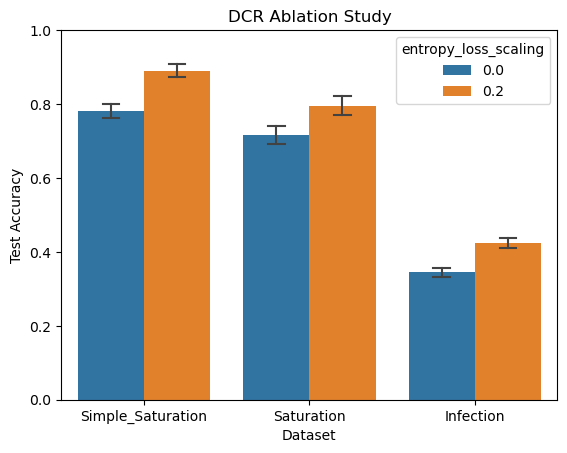

In [17]:
simple_sat = dcr_study[dcr_study['dataset'] == 'Simple_Saturation']
sat = dcr_study[dcr_study['dataset'] == 'Saturation']
infection = dcr_study[dcr_study['dataset'] == 'Infection']

plot = sns.barplot(data=dcr_study, x='dataset', y='test_accuracy', hue='entropy_loss_scaling', palette=palette, capsize=0.2, errorbar="se", errwidth=1.5)
plot.set(ylim=(0, 1.0))
plot.set_title('DCR Ablation Study')
plot.set_xlabel('Dataset')
plot.set_ylabel('Test Accuracy')


In [18]:
cmr_study_original = pd.read_csv("../experiments/ablation_study_cmr.csv")

In [19]:
cmr_study = cmr_study_original[[
    'experiment',
    'dataset',
    'fold',
    'test_accuracy',
    'aggregation_mode',
    'nonlinearity',
    'concept_embedding_size',
    'layer_type',
    'entropy_loss_scaling'
]]

# filter = dcr_study['entropy_loss_scaling'] != 'False' # Just one data point
# dcr_study = dcr_study[filter]

# print(dcr_study[dcr_study['']])
print(cmr_study['dataset'].unique())


['Simple_Saturation' 'Saturation' 'Infection']


/var/folders/m4/3_wbbgkd0mb44ngj4zrpv9w40000gn/T/ipykernel_62532/35775403.py:1: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  plot = sns.barplot(data=cmr_study, x='dataset', y='test_accuracy', hue='entropy_loss_scaling', palette=palette, capsize=0.2, errorbar="se", errwidth=1.5)


Text(0.5, 0, 'Dataset')

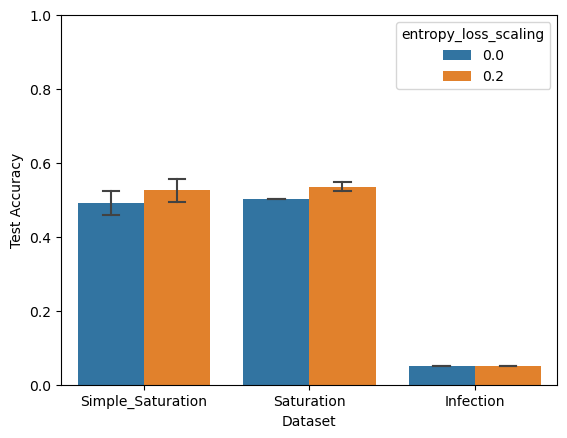

In [20]:
plot = sns.barplot(data=cmr_study, x='dataset', y='test_accuracy', hue='entropy_loss_scaling', palette=palette, capsize=0.2, errorbar="se", errwidth=1.5)
plot.set_ylim(0, 1.0)
plot.set_ylabel("Test Accuracy")
plot.set_xlabel("Dataset")


/var/folders/m4/3_wbbgkd0mb44ngj4zrpv9w40000gn/T/ipykernel_62532/3825876615.py:1: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.barplot(data=dcr_study, x='dataset', y='test_accuracy', hue='aggregation_mode', palette=palette, capsize=0.2, errorbar="se", errwidth=1.5)


<Axes: xlabel='dataset', ylabel='test_accuracy'>

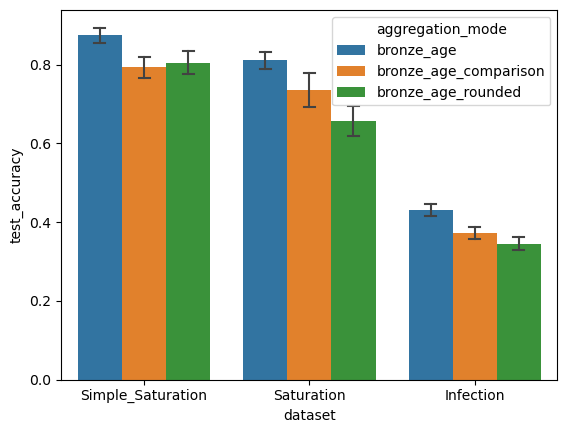

In [21]:
sns.barplot(data=dcr_study, x='dataset', y='test_accuracy', hue='aggregation_mode', palette=palette, capsize=0.2, errorbar="se", errwidth=1.5)

Apparently the embedding size experiments didn't go as expected...

<Axes: xlabel='dataset', ylabel='test_accuracy'>

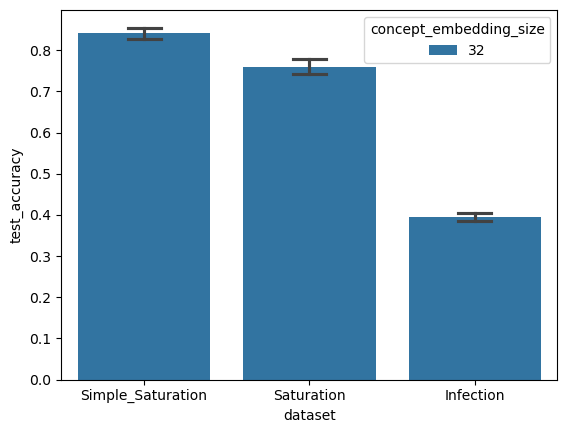

In [22]:
sns.barplot(data=dcr_study, x='dataset', y='test_accuracy', hue='concept_embedding_size', palette=palette, capsize=0.2, errorbar="se")

/var/folders/m4/3_wbbgkd0mb44ngj4zrpv9w40000gn/T/ipykernel_62532/328763561.py:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  plot = sns.barplot(data=dcr_study, x='dataset', y='test_accuracy', hue='nonlinearity', palette=palette, capsize=0.2, errorbar="se", errwidth=1.5)


Text(0.5, 0, 'Dataset')

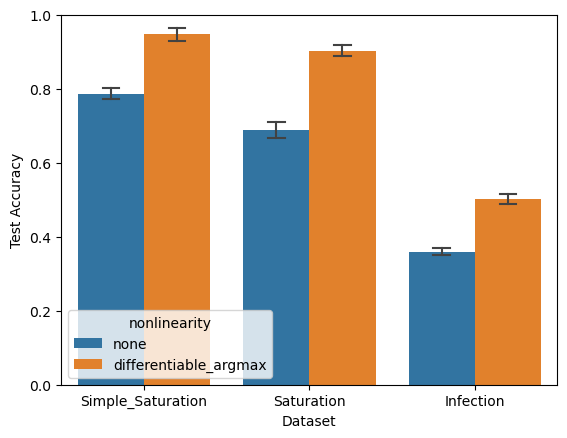

In [27]:
dcr_study['nonlinearity'] = dcr_study['nonlinearity'].fillna('none')
plot = sns.barplot(data=dcr_study, x='dataset', y='test_accuracy', hue='nonlinearity', palette=palette, capsize=0.2, errorbar="se", errwidth=1.5)
plot.set_ylim(0, 1.0)
plot.set_ylabel("Test Accuracy")
plot.set_xlabel("Dataset")
